In [499]:
import pandas as pd
import numpy as np
df = pd.read_csv('social media influencers - instagram sep-2022.csv')

In [500]:
df

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement\n,Engagement average\r\n,Category_1,Category_2
0,1,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN
1,2,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling
2,3,arianagrande,Ariana Grande,329.6M,United States,2.9M,4M,NaN,NaN
3,4,leomessi,Leo Messi,358.6M,Indonesia,2.7M,3.5M,Sports with a ball,Family
4,5,zendaya,Zendaya,151.1M,United States,4.3M,5.8M,Cinema & Actors/actresses,Fashion
...,...,...,...,...,...,...,...,...,...
1045,996,jadethirlwall,jade amelia thirlwall,9.4M,United States,174.2K,228.1K,NaN,NaN
1046,997,ninja,User Not Found,12.9M,United States,127.8K,163.9K,Computers & Gadgets,Machinery & Technologies
1047,998,myriamfares,Myriam Fares,20.6M,Iraq,75.8K,102.4K,NaN,NaN
1048,999,optimushwang,황민현,4.2M,South Korea,426K,508K,Lifestyle,NaN


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   S.no                   1050 non-null   int64 
 1   Instagram name         1050 non-null   object
 2    Name                  1029 non-null   object
 3   Subscribers            1050 non-null   object
 4   Audience country       1046 non-null   object
 5   Authentic engagement
  1050 non-null   object
 6   Engagement average
   1050 non-null   object
 7   Category_1             802 non-null    object
 8   Category_2             250 non-null    object
dtypes: int64(1), object(8)
memory usage: 74.0+ KB


In [502]:
df.columns = df.columns.str.strip().str.replace(r'[\n\t\r]+', '', regex=True)

DATA CLEANING

In [503]:
# Handle Missing Values
df['Name'] = df['Name'].fillna(df['Instagram name'])  # Impute missing names
df['Audience country'] = df['Audience country'].fillna(df['Audience country'].mode()[0])  # Impute with mode
df['Category_1'] = df['Category_1'].fillna('unknown')
df['Category_2'] = df['Category_2'].fillna('unknown')
print(f"Missing values after imputation:\n{df.isnull().sum()}")


Missing values after imputation:
S.no                    0
Instagram name          0
Name                    0
Subscribers             0
Audience country        0
Authentic engagement    0
Engagement average      0
Category_1              0
Category_2              0
dtype: int64


In [504]:
# Drop rows with missing Subscribers or Engagement metrics
df = df.dropna(subset=['Subscribers', 'Authentic engagement', 'Engagement average'])
#Standardize Formats (Convert 'M' and 'K' to numeric)
def convert_to_numeric(value):
    if isinstance(value, str):
        try:
            if 'M' in value:
                return float(value.replace('M', '')) * 1_000_000
            elif 'K' in value:
                return float(value.replace('K', '')) * 1_000
            elif 'B' in value:
                return float(value.replace('B', '')) * 1_000_000_000
            else:
                return float(value)
        except ValueError:
            return np.nan
    return value

# Apply conversion to relevant columns
df['Subscribers'] = df['Subscribers'].apply(convert_to_numeric)
df['Authentic engagement'] = df['Authentic engagement'].apply(convert_to_numeric)
df['Engagement average'] = df['Engagement average'].apply(convert_to_numeric)

In [505]:
#Remove Duplicates
# Identify and drop duplicate rows based on Instagram name

In [506]:
print("\nNumber of duplicates before removal:", df.duplicated(subset=['Instagram name']).sum())
df = df.drop_duplicates(subset=['Instagram name'], keep='first')


Number of duplicates before removal: 67


In [507]:
# Step 3.4: Clean Text
# Standardize text in Audience country and categories
df.reset_index(drop=True, inplace=True)
df['Audience country'] = df['Audience country'].str.lower().str.strip()
df['Category_1'] = df['Category_1'].str.lower().str.strip()
df['Category_2'] = df['Category_2'].str.lower().str.strip()


In [508]:
# Replace empty Category_1 with 'unknown'
df['Category_1'] = df['Category_1'].fillna('unknown')

In [509]:
# Verify data types and cleaned data
print("\nData types after cleaning:")
print(df.dtypes)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Data types after cleaning:
S.no                      int64
Instagram name           object
Name                     object
Subscribers             float64
Audience country         object
Authentic engagement    float64
Engagement average      float64
Category_1               object
Category_2               object
dtype: object

Missing values after cleaning:
S.no                    0
Instagram name          0
Name                    0
Subscribers             0
Audience country        0
Authentic engagement    0
Engagement average      0
Category_1              0
Category_2              0
dtype: int64


In [510]:
# Save cleaned dataset
df.to_csv('cleaned_instagram_influencers.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_instagram_influencers.csv'")


Cleaned dataset saved as 'cleaned_instagram_influencers.csv'


EDA

In [511]:
#  Summary Statistics
print("Summary Statistics:")
summary_stats = df[['Subscribers', 'Authentic engagement', 'Engagement average']].describe()
print(summary_stats)

Summary Statistics:
        Subscribers  Authentic engagement  Engagement average
count  9.830000e+02          9.830000e+02        9.830000e+02
mean   2.705910e+07          5.742409e+05        7.576832e+05
std    4.537167e+07          9.683734e+05        1.081646e+06
min    1.900000e+06          0.000000e+00        3.420000e+04
25%    8.950000e+06          1.754500e+05        2.557000e+05
50%    1.490000e+07          3.234000e+05        4.574000e+05
75%    2.730000e+07          6.003000e+05        8.192500e+05
max    5.466000e+08          1.270000e+07        1.270000e+07


In [512]:
#Distribution Analysis
# Calculate Engagement Rate
df['Engagement Rate'] = (df['Authentic engagement'] / df['Subscribers']) * 100

In [513]:
# Identify outliers using IQR for Engagement Rate
Q1 = df['Engagement Rate'].quantile(0.25)
Q3 = df['Engagement Rate'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Engagement Rate'] < (Q1 - 1.5 * IQR)) | (df['Engagement Rate'] > (Q3 + 1.5 * IQR))]
print("\nNumber of outliers in Engagement Rate:", len(outliers))
print("Top 5 outliers by Engagement Rate:")
print(outliers[['Instagram name', 'Engagement Rate']].sort_values(by='Engagement Rate', ascending=False).head())


Number of outliers in Engagement Rate: 93
Top 5 outliers by Engagement Rate:
    Instagram name  Engagement Rate
331  haechanahceah        39.130435
766     harshasai_        35.514815
93         yawnzzn        28.037383
604   everyone_woo        27.514706
805    junhui_moon        27.506897


In [514]:
#Category Analysis
# Group by Category_1 to compute average metrics
category_stats = df.groupby('Category_1').agg({
    'Subscribers': 'mean',
    'Authentic engagement': 'mean',
    'Engagement average': 'mean',
    'Engagement Rate': 'mean'
}).reset_index()
print("\nCategory Analysis (Top 5 by Engagement Rate):")
print(category_stats.sort_values(by='Engagement Rate', ascending=False).head())


Category Analysis (Top 5 by Engagement Rate):
            Category_1   Subscribers  Authentic engagement  \
3   business & careers  1.322500e+07         917075.000000   
21         photography  6.936667e+07         398166.666667   
16           lifestyle  1.565915e+07         677011.971831   
27             unknown  2.526807e+07         840742.436975   
8            education  7.000000e+06         379000.000000   

    Engagement average  Engagement Rate  
3         1.125200e+06         9.795297  
21        6.033222e+05         7.832382  
16        8.804162e+05         7.012014  
27        1.079749e+06         5.997804  
8         5.555000e+05         5.414286  


In [515]:
# Geographic Trends
# Group by Audience country to analyze engagement
geo_stats = df.groupby('Audience country').agg({
    'Subscribers': 'mean',
    'Engagement average': 'mean',
    'Engagement Rate': 'mean',
    'Instagram name': 'count'
}).rename(columns={'Instagram name': 'Influencer Count'}).reset_index()
print("\nGeographic Trends (Top 5 Countries by Influencer Count):")
print(geo_stats.sort_values(by='Influencer Count', ascending=False).head())


Geographic Trends (Top 5 Countries by Influencer Count):
   Audience country   Subscribers  Engagement average  Engagement Rate  \
32    united states  3.429062e+07        7.266448e+05         2.974324   
10            india  3.371159e+07        7.152561e+05         3.706294   
3            brazil  2.786434e+07        6.063846e+05         2.771152   
11        indonesia  1.914857e+07        1.035872e+06         7.792638   
16           mexico  1.895278e+07        9.213194e+05         5.006127   

    Influencer Count  
32               288  
10               164  
3                143  
11               140  
16                36  


In [516]:
# Correlation Analysis
correlation_matrix = df[['Subscribers', 'Authentic engagement', 'Engagement average', 'Engagement Rate']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      Subscribers  Authentic engagement  Engagement average  \
Subscribers              1.000000              0.220917            0.251063   
Authentic engagement     0.220917              1.000000            0.983391   
Engagement average       0.251063              0.983391            1.000000   
Engagement Rate         -0.227369              0.474222            0.473171   

                      Engagement Rate  
Subscribers                 -0.227369  
Authentic engagement         0.474222  
Engagement average           0.473171  
Engagement Rate              1.000000  


In [517]:
# Save EDA results
category_stats.to_csv('category_stats.csv', index=False)
geo_stats.to_csv('geo_stats.csv', index=False)
print("\nEDA results saved as 'category_stats.csv' and 'geo_stats.csv'")


EDA results saved as 'category_stats.csv' and 'geo_stats.csv'


DATA TRANSFORMATION

In [518]:
# Create binary column for high engagement (above median Engagement Rate)
median_engagement_rate = df['Engagement Rate'].median()
df['High Engagement'] = df['Engagement Rate'].apply(lambda x: 1 if x > median_engagement_rate else 0)

In [519]:
# Create Primary Category by prioritizing Category_1 over Category_2
df['Primary Category'] = df['Category_1'].where(df['Category_1'] != 'unknown', df['Category_2'])

In [520]:


# Create Subscriber Tier (Micro: <10M, Mid: 10M-50M, Mega: >50M)

def assign_tier(subscribers):
    if subscribers < 10_000_000:
        return 'Micro'
    elif subscribers <= 50_000_000:
        return 'Mid'
    else:
        return 'Mega'

df['Subscriber Tier'] = df['Subscribers'].apply(assign_tier)


In [521]:
#  Normalization
# Min-Max scaling for Subscribers, Authentic engagement, and Engagement average
def min_max_scale(column):
    return (column - column.min()) / (column.max() - column.min())

df['Subscribers_scaled'] = min_max_scale(df['Subscribers'])
df['Authentic engagement_scaled'] = min_max_scale(df['Authentic engagement'])
df['Engagement average_scaled'] = min_max_scale(df['Engagement average'])

In [522]:
# Aggregation
# Aggregate by Primary Category
category_agg = df.groupby('Primary Category').agg({
    'Subscribers': 'mean',
    'Engagement Rate': 'mean',
    'High Engagement': 'mean',
    'Instagram name': 'count'
}).rename(columns={'Instagram name': 'Influencer Count'}).reset_index()

In [523]:
# Aggregate by Audience country
country_agg = df.groupby('Audience country').agg({
    'Subscribers': 'mean',
    'Engagement Rate': 'mean',
    'High Engagement': 'mean',
    'Instagram name': 'count'
}).rename(columns={'Instagram name': 'Influencer Count'}).reset_index()

In [524]:
# Aggregate by Subscriber Tier
tier_agg = df.groupby('Subscriber Tier').agg({
    'Subscribers': 'mean',
    'Engagement Rate': 'mean',
    'High Engagement': 'mean',
    'Instagram name': 'count'
}).rename(columns={'Instagram name': 'Influencer Count'}).reset_index()

In [525]:
# Print results
print("Feature Engineering - Sample of New Columns:")
print(df[['Instagram name', 'Engagement Rate', 'High Engagement', 'Primary Category', 'Subscriber Tier']].head())

print("\nCategory Aggregation (Top 5 by Engagement Rate):")
print(category_agg.sort_values(by='Engagement Rate', ascending=False).head())

print("\nCountry Aggregation (Top 5 by Influencer Count):")
print(country_agg.sort_values(by='Influencer Count', ascending=False).head())

print("\nSubscriber Tier Aggregation:")
print(tier_agg)

Feature Engineering - Sample of New Columns:
  Instagram name  Engagement Rate  High Engagement           Primary Category  \
0      cristiano         1.046244                0         sports with a ball   
1    kyliejenner         0.950829                0                    fashion   
2   arianagrande         0.879854                0                    unknown   
3       leomessi         0.752928                0         sports with a ball   
4        zendaya         2.845797                1  cinema & actors/actresses   

  Subscriber Tier  
0            Mega  
1            Mega  
2            Mega  
3            Mega  
4            Mega  

Category Aggregation (Top 5 by Engagement Rate):
      Primary Category   Subscribers  Engagement Rate  High Engagement  \
3   business & careers  1.322500e+07         9.795297         0.500000   
21         photography  6.936667e+07         7.832382         0.666667   
16           lifestyle  1.565915e+07         7.012014         0.746479   
27

In [526]:
# Save transformed dataset and aggregations
df.to_csv('transformed_instagram_influencers.csv', index=False)
category_agg.to_csv('category_agg.csv', index=False)
country_agg.to_csv('country_agg.csv', index=False)
tier_agg.to_csv('tier_agg.csv', index=False)
print("\nTransformed dataset saved as 'transformed_instagram_influencers.csv'")
print("Aggregations saved as 'category_agg.csv', 'country_agg.csv', and 'tier_agg.csv'")


Transformed dataset saved as 'transformed_instagram_influencers.csv'
Aggregations saved as 'category_agg.csv', 'country_agg.csv', and 'tier_agg.csv'


DATA VISUALIZATION

In [527]:
import seaborn as sns
import matplotlib.pyplot as plt



In [528]:
sns.set_style("whitegrid")
sns.set_palette("muted")

TypeError: text() got multiple values for argument 'x'

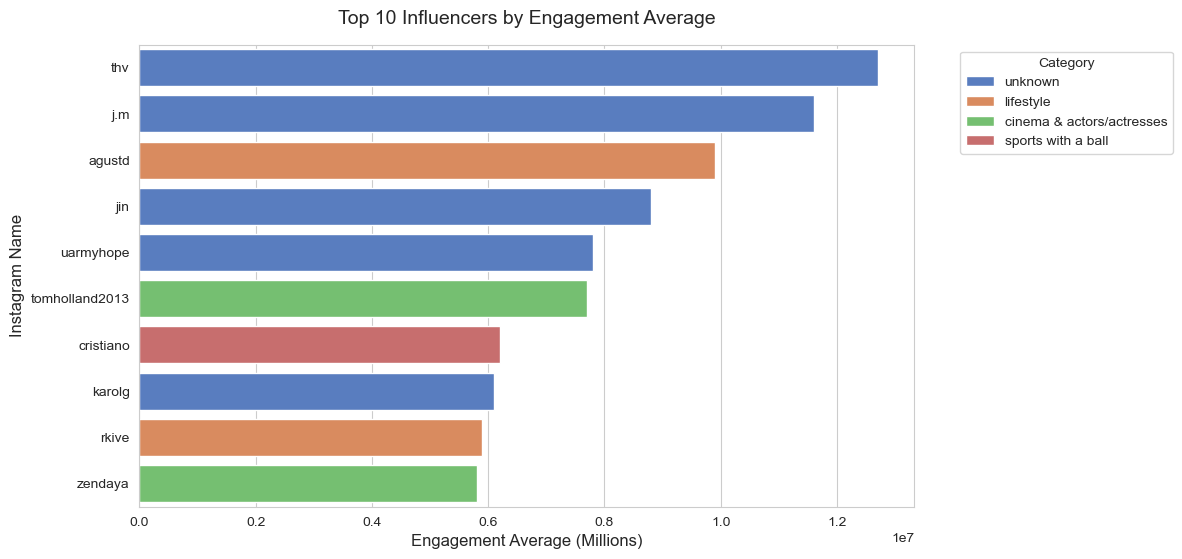

In [529]:
# Static Visualizations (Seaborn, Matplotlib)
# Bar Plot: Top 10 Influencers by Engagement Average
top_10_influencers = df.nlargest(10, 'Engagement average')[['Instagram name', 'Engagement average', 'Category_1']]
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='Engagement average', y='Instagram name', hue='Category_1', data=top_10_influencers)
plt.title('Top 10 Influencers by Engagement Average', fontsize=14, pad=15)
plt.xlabel('Engagement Average (Millions)', fontsize=12)
plt.ylabel('Instagram Name', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
for p in bar.patches:  # Add annotations
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height()/2, f'{width/1e6:.2f}M', 
             ha='left', va='center', x=width+0.05e6)
plt.tight_layout()
plt.show()
plt.close()

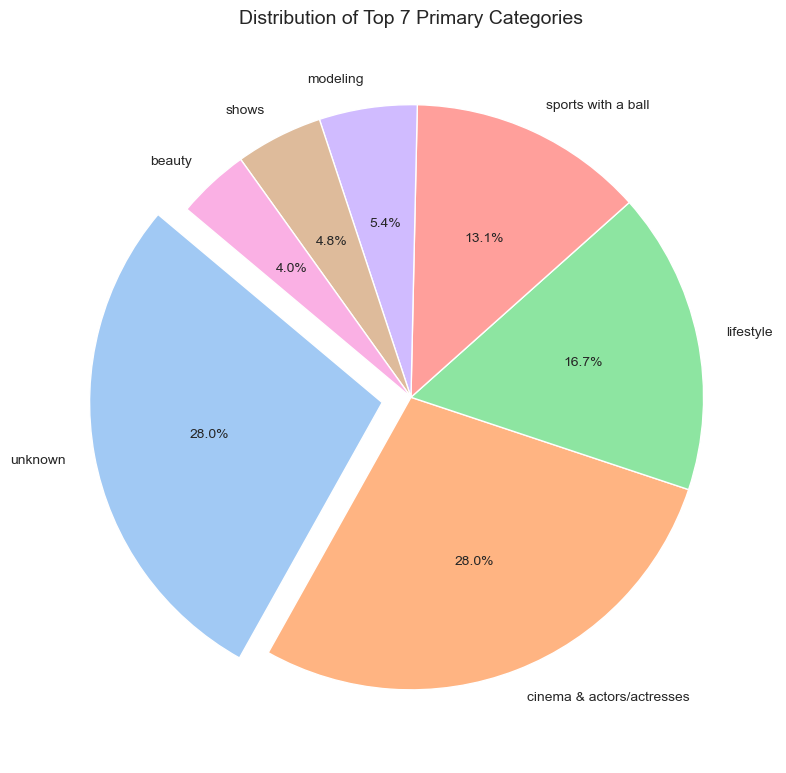

In [530]:
# Pie Chart: Distribution of Top 7 Primary Categories
top_7_categories = df['Category_1'].value_counts().nlargest(7)
plt.figure(figsize=(8, 8))
plt.pie(top_7_categories, labels=top_7_categories.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("pastel"), explode=[0.1] + [0]*6)
plt.title('Distribution of Top 7 Primary Categories', fontsize=14)
plt.tight_layout()
plt.show()
plt.close()

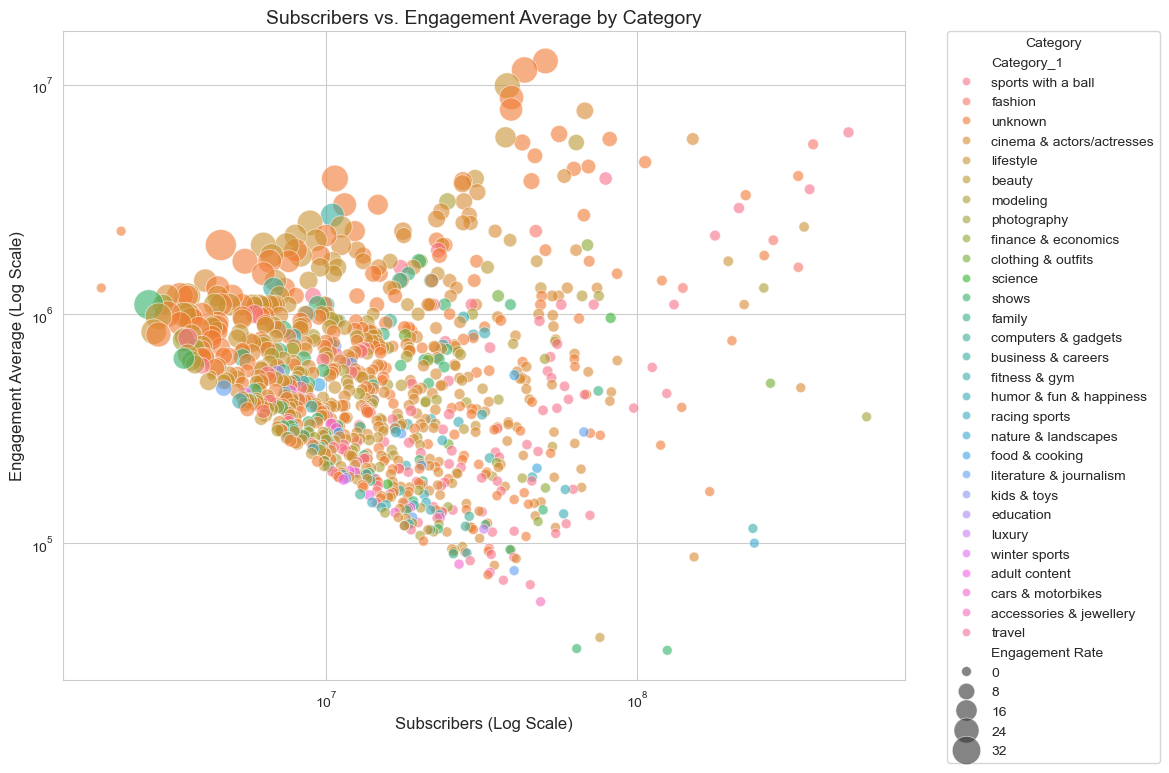

In [531]:
# Scatter Plot: Subscribers vs. Engagement Average, Colored by Primary Category

fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x='Subscribers', y='Engagement average', hue='Category_1', 
                size='Engagement Rate', sizes=(50, 500), data=df, alpha=0.6)
plt.xscale('log')  
plt.yscale('log')  
plt.title('Subscribers vs. Engagement Average by Category', fontsize=14)
plt.xlabel('Subscribers (Log Scale)', fontsize=12)
plt.ylabel('Engagement Average (Log Scale)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Category',borderaxespad=0)
plt.tight_layout()
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
plt.close()

Correlation Matrix of Numeric Features:
                      Subscribers  Authentic engagement  Engagement average  \
Subscribers              1.000000              0.220917            0.251063   
Authentic engagement     0.220917              1.000000            0.983391   
Engagement average       0.251063              0.983391            1.000000   
Engagement Rate         -0.227369              0.474222            0.473171   

                      Engagement Rate  
Subscribers                 -0.227369  
Authentic engagement         0.474222  
Engagement average           0.473171  
Engagement Rate              1.000000  


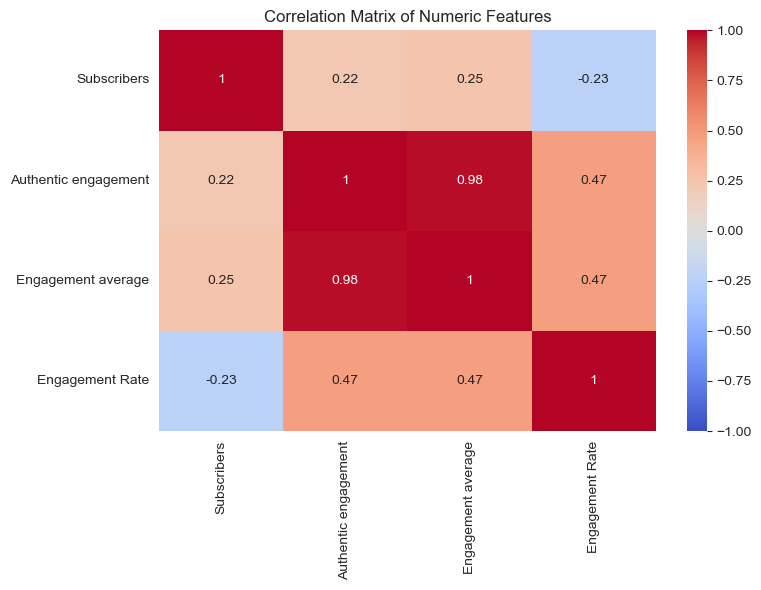

In [532]:
# Heatmap: Correlation Matrix
numeric_cols = ['Subscribers', 'Authentic engagement', 'Engagement average', 'Engagement Rate']
correlation_matrix = df[numeric_cols].corr()
print("Correlation Matrix of Numeric Features:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd

# Prepare top_7_categories
top_7_categories = df['Category_1'].value_counts().nlargest(7).reset_index()
top_7_categories.columns = ['Category', 'Count']

# Initialize subplot
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Top 10 Influencers by Engagement", "Category Distribution"),
                    specs=[[{"type": "bar"}, {"type": "pie"}]])

# Get unique categories and countries
categories = df['Category_1'].unique()
countries = df['Audience country'].dropna().unique()

# Track which categories and countries have traces
category_bar_indices = {}
category_pie_indices = {}
country_bar_indices = {}
country_pie_indices = {}

# Add bar traces for each category
bar_traces = []
for idx, cat in enumerate(categories):
    filtered_df = df[df['Category_1'] == cat].nlargest(10, 'Engagement average')
    if not filtered_df.empty:
        bar = px.bar(filtered_df, x='Engagement average', y='Instagram name', color='Category_1',
                     text_auto='.2s', labels={'Engagement average': 'Engagement (Millions)'})
        trace = bar.data[0]
        trace.visible = False
        category_bar_indices[cat] = len(bar_traces)
        bar_traces.append(trace)
        fig.add_trace(trace, row=1, col=1)

# Add bar traces for each country
for idx, country in enumerate(countries):
    filtered_df = df[df['Audience country'] == country].nlargest(10, 'Engagement average')
    if not filtered_df.empty:
        bar = px.bar(filtered_df, x='Engagement average', y='Instagram name', color='Category_1',
                     text_auto='.2s', labels={'Engagement average': 'Engagement (Millions)'})
        trace = bar.data[0]
        trace.visible = False
        country_bar_indices[country] = len(bar_traces)
        bar_traces.append(trace)
        fig.add_trace(trace, row=1, col=1)

# Default bar trace
default_bar = px.bar(df.nlargest(10, 'Engagement average'), x='Engagement average', y='Instagram name',
                     color='Category_1', text_auto='.2s', labels={'Engagement average': 'Engagement (Millions)'})
default_bar_trace = default_bar.data[0]
default_bar_trace.visible = True
default_bar_index = len(bar_traces)
bar_traces.append(default_bar_trace)
fig.add_trace(default_bar_trace, row=1, col=1)

# Add pie traces for each category
pie_traces = []
for idx, cat in enumerate(categories):
    filtered_counts = df[df['Category_1'] == cat]['Category_1'].value_counts().reindex(top_7_categories['Category']).fillna(0)
    if filtered_counts.sum() > 0:
        pie = px.pie(names=top_7_categories['Category'], values=filtered_counts,
                     color_discrete_sequence=px.colors.qualitative.Pastel)
        trace = pie.data[0]
        trace.visible = False
        category_pie_indices[cat] = len(pie_traces)
        pie_traces.append(trace)
        fig.add_trace(trace, row=1, col=2)

# Add pie traces for each country
for idx, country in enumerate(countries):
    filtered_counts = df[df['Audience country'] == country]['Category_1'].value_counts().reindex(top_7_categories['Category']).fillna(0)
    if filtered_counts.sum() > 0:
        pie = px.pie(names=top_7_categories['Category'], values=filtered_counts,
                     color_discrete_sequence=px.colors.qualitative.Pastel)
        trace = pie.data[0]
        trace.visible = False
        country_pie_indices[country] = len(pie_traces)
        pie_traces.append(trace)
        fig.add_trace(trace, row=1, col=2)

# Default pie trace
default_pie = px.pie(top_7_categories, values='Count', names='Category',
                     color_discrete_sequence=px.colors.qualitative.Pastel)
default_pie_trace = default_pie.data[0]
default_pie_trace.visible = True
default_pie_index = len(pie_traces)
pie_traces.append(default_pie_trace)
fig.add_trace(default_pie_trace, row=1, col=2)

# Create dropdown menus
category_buttons = [
    dict(label="All Categories", method="update", args=[{
        "visible": [True if i == default_bar_index else False for i in range(len(bar_traces))] +
                   [True if i == default_pie_index else False for i in range(len(pie_traces))]
    }])
]
for cat in categories:
    if cat in category_bar_indices and cat in category_pie_indices:
        visible = [False] * len(bar_traces)
        visible[category_bar_indices[cat]] = True
        pie_visible = [False] * len(pie_traces)
        pie_visible[category_pie_indices[cat]] = True
        category_buttons.append(
            dict(label=cat, method="update", args=[{"visible": visible + pie_visible}])
        )

country_buttons = [
    dict(label="All Countries", method="update", args=[{
        "visible": [True if i == default_bar_index else False for i in range(len(bar_traces))] +
                   [True if i == default_pie_index else False for i in range(len(pie_traces))]
    }])
]
for country in countries:
    if country in country_bar_indices and country in country_pie_indices:
        visible = [False] * len(bar_traces)
        visible[country_bar_indices[country]] = True
        pie_visible = [False] * len(pie_traces)
        pie_visible[country_pie_indices[country]] = True
        country_buttons.append(
            dict(label=country, method="update", args=[{"visible": visible + pie_visible}])
        )

# Update layout
fig.update_layout(
    title_text="Instagram Influencer Analytics Dashboard",
    title_x=0.5,
    showlegend=True,
    height=600,
    width=1200,
    template='plotly_white',
    updatemenus=[
        dict(buttons=category_buttons,
             direction="down", showactive=True, x=0.1, y=1.2, xanchor="left", yanchor="top",
             font=dict(size=12), bgcolor='rgba(255,255,255,0.8)'),
        dict(buttons=country_buttons,
             direction="down", showactive=True, x=0.5, y=1.2, xanchor="left", yanchor="top",
             font=dict(size=12), bgcolor='rgba(255,255,255,0.8)')
    ],
    font=dict(family="Arial", size=12),
    margin=dict(t=150)
)

# Update axes
fig.update_xaxes(title_text="Engagement (Millions)", row=1, col=1, tickformat=".2s")
fig.update_yaxes(title_text="Influencer", row=1, col=1)

# Save and show
fig.write_html('influencer_dashboard.html')
fig.show()

In [ ]:
#Word Cloud for Categories
# Combine Category_1 and Category_2 for word cloud
from wordcloud import WordCloud
category_text = ' '.join(df['Primary Category'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Primary Categories')
plt.show()